<a href="https://colab.research.google.com/github/Carl-Zzdr/MLstudy/blob/main/HRnumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# 加载 MNIST 数据集
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 正则化像素值到 0-1 之间
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.8908 - loss: 0.3514 - val_accuracy: 0.9857 - val_loss: 0.0439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9858 - loss: 0.0444 - val_accuracy: 0.9881 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9898 - val_loss: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9936 - loss: 0.0214 - val_accuracy: 0.9914 - val_loss: 0.0300
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9908 - val_loss: 0.0280


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


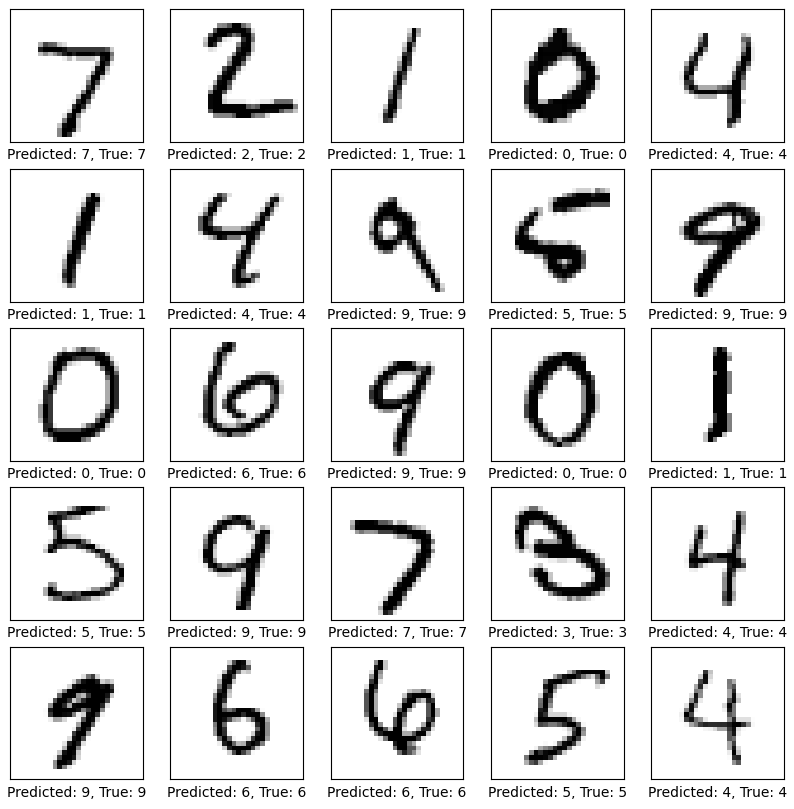

In [6]:
# 预测
predictions = model.predict(test_images)

# 可视化结果
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()


In [9]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found. Running on CPU instead.')
else:
    print(f'Found GPU at: {device_name}')


GPU device not found. Running on CPU instead.
